<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Visualizing CARTs with admissions data

_Instructor: Aymeric Flaisler_

---

Using the admissions data from earlier in the course, build CARTs, look at how they work visually, and compare their performance to more standard, parametric models.



---

### 1. Install and load the packages required to visually show decision tree branching

You will need to first:

1. Install `graphviz` with homebrew. The command will be `brew install graphviz`
- Install `pydotplus` with `conda install pydotplus`
- Load the packages as shown below (you may need to restart the kernel after the installations.)

In [32]:
# REQUIREMENTS:
# pip install pydotplus
# brew install graphviz

# Use graphviz to make a chart of the regression tree decision points:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

---

### 2. Load in admissions data and other python packages

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [34]:
admit = pd.read_csv('../../../../resource-datasets/admissions/admissions.csv')

---

### 3. Create regression and classification X, y data

The regression data will be:

    Xr = [admit, gre, prestige]
    yr = gpa
    
The classification data will be:

    Xc = [gre, gpa, prestige]
    yc = admit

In [35]:
# We focus on data we have for the time being.
# dont want to spend an unessary amount of time cleaning.
admit = admit.dropna()

In [36]:
admit.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [37]:
Xr = admit[['admit','gre','prestige']]
yr = admit.gpa.values

Xc = admit[['gpa','gre','prestige']]
yc = admit.admit.values

---

### 4. Cross-validate regression and logistic regression on the data

Fit a linear regression for the regression problem and a logistic for the classification problem. Cross-validate the R2 and accuracy scores.

In [38]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score

In [39]:
# cross val Linear Reg with 4 folds
lr = LinearRegression()
reg_scores = cross_val_score(lr, Xr, yr, cv = 4)

# cross val Logistic Reg with 4 folds
cls = LogisticRegression()
cls_scores = cross_val_score(cls, Xc, yc, cv = 4)

#get scores
print(reg_scores, np.mean(reg_scores))
print(cls_scores, np.mean(cls_scores))

[0.22470964 0.08296819 0.03204903 0.16434809] 0.12601873539032846
[0.71       0.72       0.68686869 0.70408163] 0.7052375798804369


In [40]:
# fit models
linreg = LinearRegression().fit(Xr, yr) #R2
logreg = LogisticRegression().fit(Xc, yc) #accuracy

In [41]:
print('linreg', linreg)
print('logreg', logreg)

linreg LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
logreg LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


---

### 5. Building regression trees

With `DecisionTreeRegressor`:

1. Build 4 models with different parameters for `max_depth`: `max_depth=1`, `max_depth=2`, `max_depth=3`, and `max_depth=None`
2. Cross-validate the R2 scores of each of the models and compare to the linear regression earlier.

In [152]:
from sklearn.tree import DecisionTreeRegressor

In [156]:
# set 4 models
clf_0 = DecisionTreeRegressor(max_depth=1)
clf_1 = DecisionTreeRegressor(max_depth=2)
clf_2 = DecisionTreeRegressor(max_depth=3)
clf_3 = DecisionTreeRegressor()

In [157]:
# fit the 4 models
clf_0.fit(Xc, yc)
clf_1.fit(Xc, yc)
clf_2.fit(Xc, yc)
clf_3.fit(Xc, yc)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [158]:
# cross validate the 4 models
cls_scores_0 = cross_val_score(clf_0, Xr, yr)
cls_scores_1 = cross_val_score(clf_1, Xr, yr)
cls_scores_2 = cross_val_score(clf_2, Xr, yr)
cls_scores_3 = cross_val_score(clf_3, Xr, yr)

In [52]:
print('cls_scores_0', cls_scores_0)
print('cls_scores_1', cls_scores_1)
print('cls_scores_2', cls_scores_2)
print('cls_scores_3', cls_scores_3)

cls_scores_0 [ 0.1307558  -0.05052751  0.10912438]
cls_scores_1 [ 0.16092136 -0.0376081   0.14291923]
cls_scores_2 [ 0.18360983 -0.05317791  0.14311805]
cls_scores_3 [-0.11998749 -0.33825309 -0.22013983]


In [57]:
# score the 4 models
cls_scores_0 = clf_0.score(Xr, yr)
cls_scores_1 = clf_1.score(Xr, yr)
cls_scores_2 = clf_2.score(Xr, yr)
cls_scores_3 = clf_3.score(Xr, yr)

In [59]:
print('cls_scores_0', cls_scores_0)
print('cls_scores_1', cls_scores_1)
print('cls_scores_2', cls_scores_2)
print('cls_scores_3', cls_scores_3)

#Is worse than the linear regression

cls_scores_0 -69.85700358210843
cls_scores_1 -69.85356153829768
cls_scores_2 -69.10199840331703
cls_scores_3 -60.91909357590026


---

### 6. Visualizing the regression tree decisions

Use the template code below to create charts that show the logic/branching of your four decision tree regressions from above.

#### Interpreting a regression tree diagram

- First line is the condition used to split that node (go left if true, go right if false)
- `samples` is the number of observations in that node before splitting
- `mse` is the mean squared error calculated by comparing the actual response values in that node against the mean response value in that node
- `value` is the mean response value in that node

In [60]:
# TEMPLATE CODE
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# initialize the output file object
dot_data = StringIO() 

# my fit DecisionTreeRegressor object here is: dtr1
# for feature_names i put the columns of my Xr matrix
export_graphviz(clf_0, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xr.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 
# To save the image of the tree
graph.write_png('./dtr1.png')

True

In [61]:
# A:

---

### 7. Building classification trees

With `DecisionTreeClassifier`:

1. Again build 4 models with different parameters for `max_depth`: `max_depth=1`, `max_depth=2`, `max_depth=3`, and `max_depth=None`
2. Cross-validate the accuracy scores of each of the models and compare to the logistic regression earlier.

Note that now you'll be using the classification task where we are predicting `admit`.

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
# set 4 models
clf_0 = DecisionTreeRegressor(max_depth=1)
clf_1 = DecisionTreeRegressor(max_depth=2)
clf_2 = DecisionTreeRegressor(max_depth=3)
clf_3 = DecisionTreeRegressor()

In [80]:
# fit the 4 models
# fit the 4 models
clf_0.fit(Xc, yc)
clf_1.fit(Xc, yc)
clf_2.fit(Xc, yc)
clf_3.fit(Xc, yc)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [81]:
# score the 4 models
cls_scores_0 = clf_0.score(Xc, yc)
cls_scores_1 = clf_1.score(Xc, yc)
cls_scores_2 = clf_2.score(Xc, yc)
cls_scores_3 = clf_3.score(Xc, yc)

In [82]:
# score the 4 models
print('cls_scores_0', cls_scores_0)
print('cls_scores_1', cls_scores_1)
print('cls_scores_2', cls_scores_2)
print('cls_scores_3', cls_scores_3)

cls_scores_0 0.04872636103186445
cls_scores_1 0.11302399087385762
cls_scores_2 0.15993062708327477
cls_scores_3 0.9806224252718719


---

### 8. Visualize the classification trees

The plotting code will be the same as for regression, you just need to change the model you're using for each plot and the feature names.

The output changes somewhat from the regression tree chart. Earlier it would give the MSE of that node, but now there is a line called `value` that tells you the count of each class at that node.

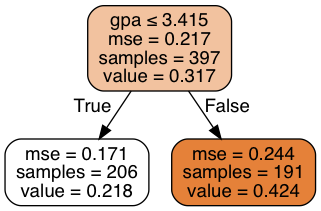

In [83]:
# TEMPLATE CODE for max_depth = 1
dot_data = StringIO()  

export_graphviz(clf_0, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xc.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

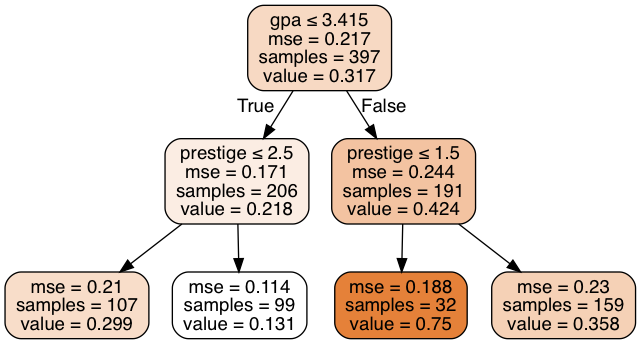

In [84]:
# max_depth = 2
dot_data = StringIO()  

export_graphviz(clf_1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xc.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

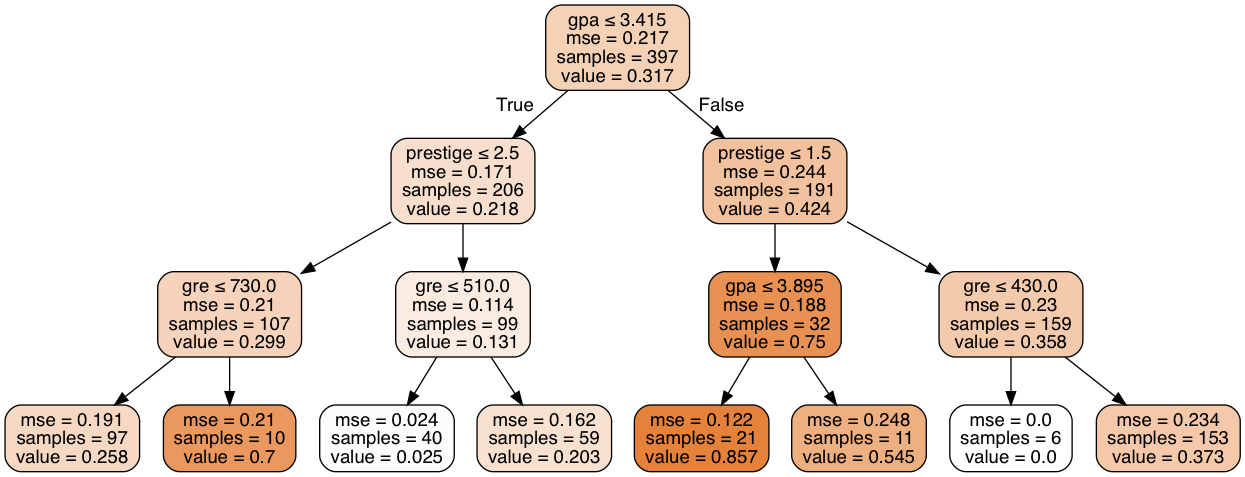

In [85]:
# max_depth = 3
dot_data = StringIO()  

export_graphviz(clf_2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xc.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

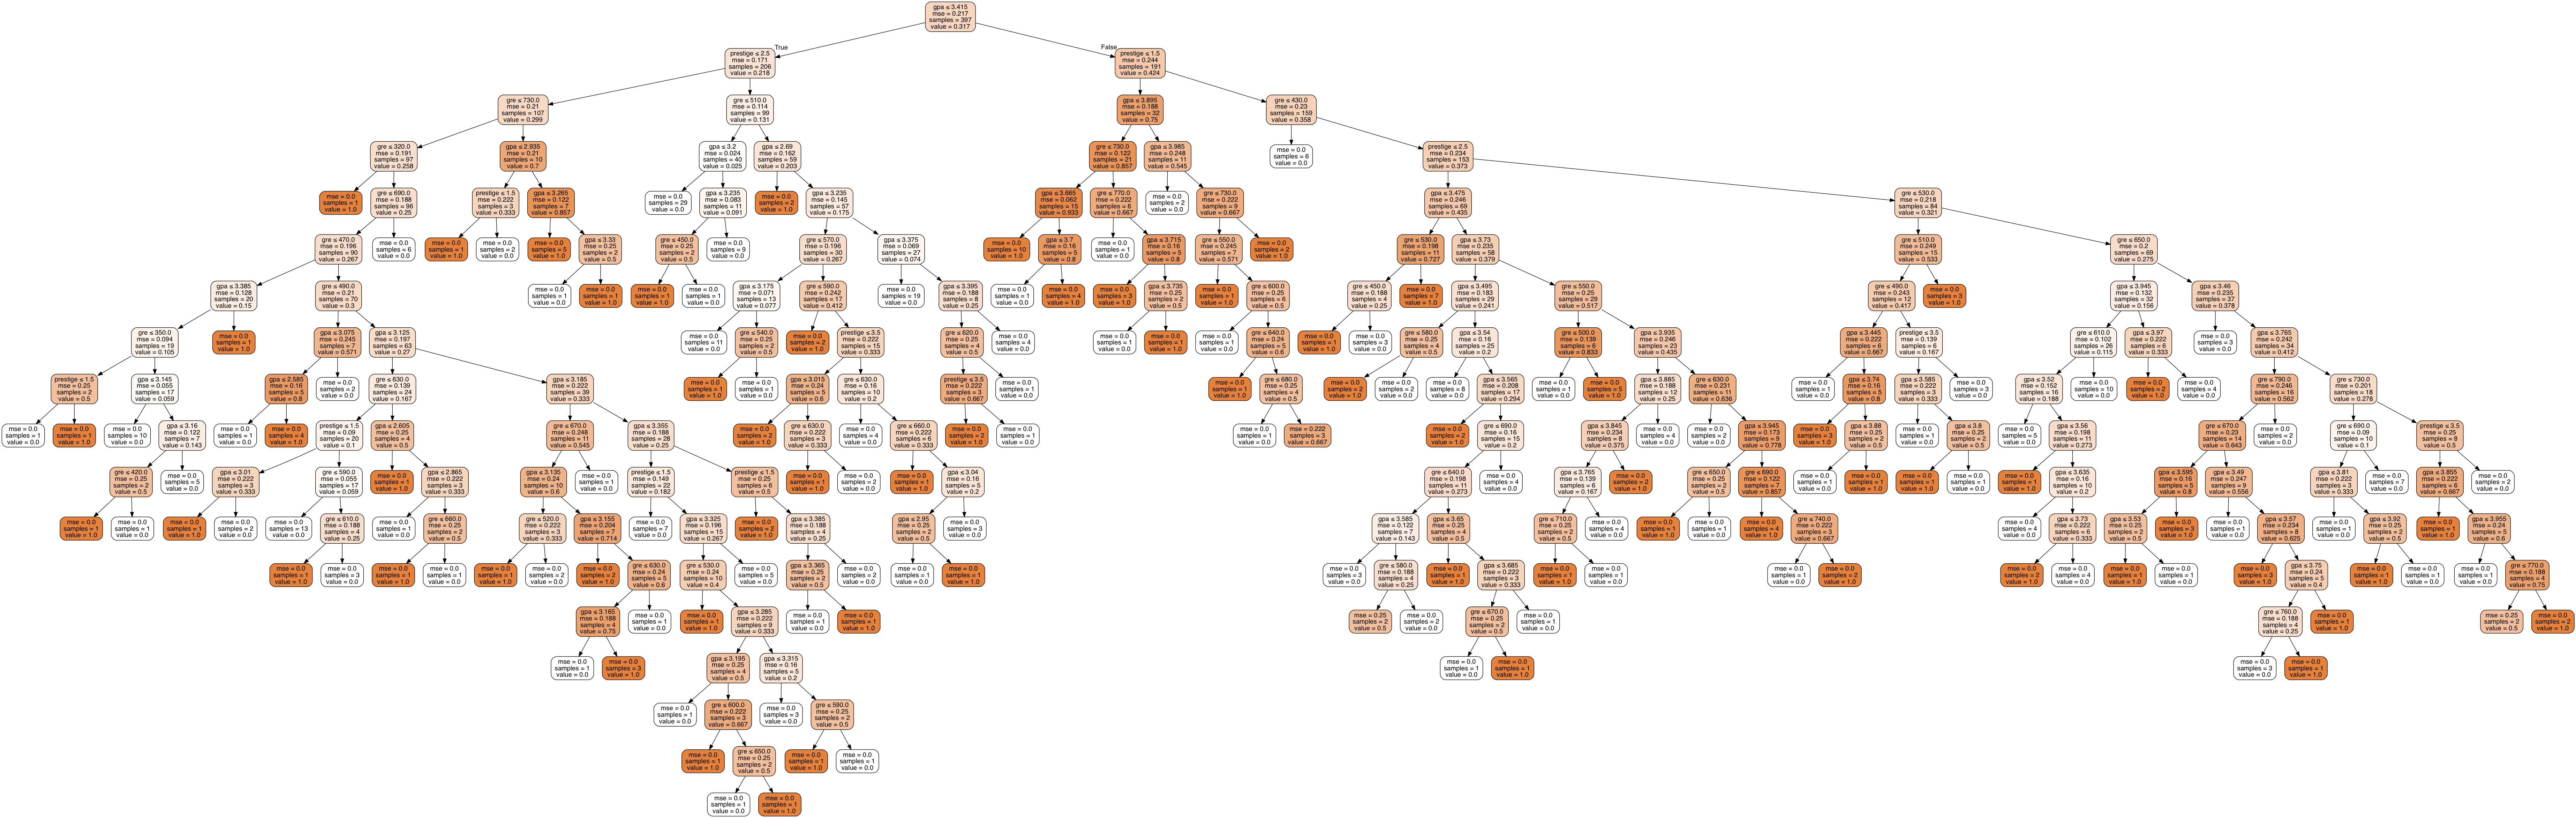

In [86]:
# max_depth = 4
dot_data = StringIO()  

export_graphviz(clf_3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xc.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

---

### 9. Using GridSearchCV to find the best decision tree classifier

As decision trees that are unrestricted will just end up over fitting the training data. Decision tree regression and classification models in sklearn offer a variety of ways to "pre-prune" (by restricting the how many times the tree can branch and what it can use).

Measure           | What it does
------------------|-------------
max_depth         | How many nodes deep can the decision tree go?
max_features      | Is there a cut off to the number of features to use?
max_leaf_nodes    | How many leaves can be generated per node?
min_samples_leaf  | How many samples need to be included at a leaf, at a minimum?  
min_samples_split | How many samples need to be included at a node, at a minimum?

It is not always best to search over _all_ of these in a grid search, unless you have a small dataset. Many of them while not redundant are going to have very similar effects on your model's fit.

Check out the documentation here:

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

---

#### Switch over to the college stats dataset

We are going to be predicting whether or not a college is public or private. Set up your X, y variables accordingly.

In [112]:
col = pd.read_csv('../../../week06/day1_decision_trees/trees-CARTs-lab/datasets/College.csv')

In [113]:
col.head(2)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56


In [114]:
y = col.pop('Private')

In [123]:
# Set up your X, y variables accordingly
X = col.iloc[:,1:]

---

### 10. Building classification trees

With `DecisionTreeClassifier`:

1. Build 4 models with different parameters for `max_depth`: `max_depth=1`, `max_depth=2`, `max_depth=3`, and `max_depth=None`
2. Cross-validate the accuracy scores of each of the models and compare to the logistic regression earlier.


In [159]:
# set 4 trees
dtc1 = DecisionTreeClassifier('entropy', max_depth=1)
dtc2 = DecisionTreeClassifier('entropy', max_depth=2)
dtc3 = DecisionTreeClassifier('entropy', max_depth=3)
dtcN = DecisionTreeClassifier('entropy', max_depth=None)

In [160]:
# fit 4 trees
dtc1.fit(X, y)
dtc2.fit(X, y)
dtc3.fit(X, y)
dtcN.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [161]:
# use CV to evaluate the 4 trees
dtc1_scores = cross_val_score(dtc1, X, y, cv=4)
dtc2_scores = cross_val_score(dtc2, X, y, cv=4)
dtc3_scores = cross_val_score(dtc3, X, y, cv=4)
dtcN_scores = cross_val_score(dtcN, X, y, cv=4)

print(dtc1_scores, np.mean(dtc1_scores))
print(dtc2_scores, np.mean(dtc2_scores))
print(dtc3_scores, np.mean(dtc3_scores))
print(dtcN_scores, np.mean(dtcN_scores))

[0.87179487 0.82474227 0.81958763 0.82989691] 0.8365054189796458
[0.90769231 0.89690722 0.91752577 0.91237113] 0.908624107850912
[0.9025641  0.92268041 0.91237113 0.90721649] 0.911208035950304
[0.91282051 0.91752577 0.91752577 0.89175258] 0.9099061591329632


---

### 11. Set up and run the gridsearch on the data

In [162]:
from sklearn.model_selection import GridSearchCV

In [163]:
# gridsearch params
dtc_params = {'max_depth': np.arange(3, 10)}

In [164]:
# Set the gridsearch
tree = GridSearchCV(DecisionTreeClassifier('entropy'), dtc_params)

In [165]:
# use the gridsearchCV model to fit the data
tree.fit(X,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [166]:
tree.best_score_

0.918918918918919

In [167]:
tree.best_params_

{'max_depth': 9}

In [168]:
tree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

---

### 12. print out the "feature importances"

The model has an attribute called `.feature_importances_` which can tell us which features were most important vs. others. It ranges from 0 to 1, with 1 being the most important.

An easy way to think about the feature importance is how much that particular variable was used to make decisions. Really though, it also takes into account how much that feature contributed to splitting up the class or reducing the variance.

A feature with higher feature importance reduced the criterion (impurity) more than the other features.

Below, show the feature importances for each variable predicting private vs. not, sorted by most important feature to least.

In [169]:
clf = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [170]:
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [171]:
print(clf.feature_importances_)

[0.00772305 0.         0.03582364 0.0226927  0.00854667 0.43393693
 0.02167058 0.35402662 0.02417296 0.00908215 0.         0.01416139
 0.02874071 0.00472046 0.03470213 0.         0.        ]


In [172]:
# Fill and print(the dataframe:
fi = pd.DataFrame({
    'feature': X.columns,
    'importance': clf.feature_importances_
})

In [173]:
fi.head()

,feature,importance
0,Apps,0.007723
1,Accept,0.000000
2,Enroll,0.035824
3,Top10perc,0.022693
4,Top25perc,0.008547
